In [3]:
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt


## Example 1

In [4]:
X = np.array( [[0,0], [0,1], [1,0], [1,1]],dtype=np.float32)
Y = np.array([[0], [1], [1], [1]],dtype=np.float32)

x= tf.placeholder(tf.float32, shape=[None, 2],name="x")
t= tf.placeholder(tf.float32, shape=[None, 1],name="t")


In [5]:
with tf.name_scope("layer"):
    w = tf.Variable(tf.zeros([2,1]))
    b = tf.Variable(tf.zeros([1]))
    y= tf.sigmoid( tf.matmul(x, w) + b )

    w_hist =tf.summary.histogram("weight",w)
    b_hist =tf.summary.histogram("bias",b)
    y_hist =tf.summary.histogram("y",y)

In [6]:
with tf.name_scope("cross_entropy"):
    cross_entropy = - tf.reduce_sum( t*tf.log(y) + (1-t)*tf.log(1-y) )
    entropy = tf.summary.scalar("cross_entropy",cross_entropy)

In [7]:
with tf.name_scope("train_step"):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [8]:
with tf.name_scope("correct_prediction"):
    correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

In [9]:
with tf.Session() as sess:
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs")
    writer.add_graph(sess.graph)
    
    init=tf.global_variables_initializer()
    sess.run(init)
    
    for step in range(10000):
        if step % 1000 ==0:
            print(step,sess.run(cross_entropy, feed_dict={x: X, t: Y}))
            print(step,sess.run(w))
            print(step,sess.run(y, feed_dict={x: X}))

0 2.7725887
0 [[0.]
 [0.]]
0 [[0.5]
 [0.5]
 [0.5]
 [0.5]]
1000 2.7725887
1000 [[0.]
 [0.]]
1000 [[0.5]
 [0.5]
 [0.5]
 [0.5]]
2000 2.7725887
2000 [[0.]
 [0.]]
2000 [[0.5]
 [0.5]
 [0.5]
 [0.5]]
3000 2.7725887
3000 [[0.]
 [0.]]
3000 [[0.5]
 [0.5]
 [0.5]
 [0.5]]
4000 2.7725887
4000 [[0.]
 [0.]]
4000 [[0.5]
 [0.5]
 [0.5]
 [0.5]]
5000 2.7725887
5000 [[0.]
 [0.]]
5000 [[0.5]
 [0.5]
 [0.5]
 [0.5]]
6000 2.7725887
6000 [[0.]
 [0.]]
6000 [[0.5]
 [0.5]
 [0.5]
 [0.5]]
7000 2.7725887
7000 [[0.]
 [0.]]
7000 [[0.5]
 [0.5]
 [0.5]
 [0.5]]
8000 2.7725887
8000 [[0.]
 [0.]]
8000 [[0.5]
 [0.5]
 [0.5]
 [0.5]]
9000 2.7725887
9000 [[0.]
 [0.]]
9000 [[0.5]
 [0.5]
 [0.5]
 [0.5]]


## Example 2

In [69]:
from sklearn.utils import shuffle
M=2 #dimension
K=3 # of class
n=100 # number of data in each class
N = n*K # number of total data

In [70]:
X1 = np.random.randn(n, M) + np.array([0, 10]) 
X2 = np.random.randn(n, M) + np.array([5, 5]) 
X3 = np.random.randn(n, M) + np.array([10, 0]) 

Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis=0)
Y= np.concatenate((Y1, Y2, Y3), axis=0)


x=tf.placeholder(tf.float32, shape=[None, M])
t=tf.placeholder(tf.float32, shape=[None, K])

In [71]:
with tf.name_scope('layer'):
    W = tf.Variable(tf.zeros([M, K]))
    b = tf.Variable(tf.zeros([K]))
    y=tf.nn.softmax(tf.matmul(x,W) + b)


In [72]:
with tf.name_scope("cross_entropy"):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y), reduction_indices=[1])) ## reduction_index = axis
    entropy = tf.summary.scalar("cross_entropy",cross_entropy)

In [73]:
with tf.name_scope("train_step"):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)


In [74]:
with tf.name_scope("correct_prediction"):
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

In [75]:
batch_size=50
n_batches = N //batch_size

In [79]:
with tf.Session() as sess:
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs")
    writer.add_graph(sess.graph)
    
    init=tf.global_variables_initializer()
    sess.run(init)

    for step in range(10000):   
        for i in range(n_batches):
            start = i*batch_size
            end = start + batch_size
 
            X_, Y_ = shuffle(X, Y)
                                            
            if step % 1000 == 0:
                summary, _= sess.run([merged_summary,train_step],feed_dict={x: X_[start:end],t: Y_[start:end]})
                writer.add_summary(summary,step)
                                
            
                print(step,sess.run(cross_entropy, feed_dict={x: X_[start:end],t: Y_[start:end]}))
                print(step,sess.run(y, feed_dict={x: X_[start:end]}))
        

InvalidArgumentError: You must feed a value for placeholder tensor 't_1' with dtype float and shape [?,1]
	 [[Node: t_1 = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 't_1', defined at:
  File "C:\Users\user\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\user\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\user\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\user\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\user\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\user\Anaconda\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\user\Anaconda\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\user\Anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\user\Anaconda\lib\site-packages\tornado\ioloop.py", line 759, in _run_callback
    ret = callback()
  File "C:\Users\user\Anaconda\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\user\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "C:\Users\user\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\user\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\user\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\user\Anaconda\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\user\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\user\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\user\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\user\Anaconda\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\user\Anaconda\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\user\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\user\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\user\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\user\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-bbea9003cc0f>", line 5, in <module>
    t= tf.placeholder(tf.float32, shape=[None, 1],name="t")
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1734, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 4923, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 3414, in create_op
    op_def=op_def)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 't_1' with dtype float and shape [?,1]
	 [[Node: t_1 = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


## Example 3

In [18]:
from sklearn import datasets

N = 300
X, y =datasets.make_moons(N, noise=0.3)

#plt.plot(X, "o", col=2)
c1=np.zeros([100])+1
c2=np.zeros([100])+2
c3=np.zeros([100])+3
c=np.concatenate([c1, c2, c3])


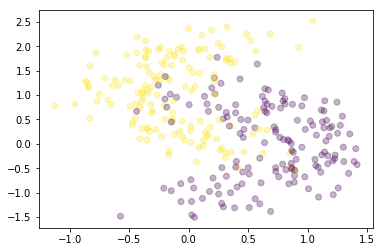

In [19]:
with tf.name_scope("plot"):
    plt.scatter(X[:,1],X[:,0],  alpha=0.3, cmap="viridis", c =y)

In [42]:
from sklearn.model_selection import train_test_split
from tensorboard import summary
from tensorboard.plugins.custom_scalar import layout_pb2

Y=y.reshape(N,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

C:\Users\user\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [44]:
num_hidden = 3

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

In [45]:
with tf.name_scope("layer1"):
    W1 = tf.Variable(tf.truncated_normal([2, num_hidden]))
    b1 = tf.Variable(tf.zeros([num_hidden]))
    z1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)


In [46]:
with tf.name_scope("layer2"):
    W2 = tf.Variable(tf.truncated_normal([num_hidden, 1]))
    b2 = tf.Variable(tf.zeros([1]))
    z2 = tf.nn.sigmoid(tf.matmul(z1, W2) + b2)


In [47]:
with tf.name_scope("cross_entropy"):
    cross_entropy = -tf.reduce_sum(t*tf.log(z2) + (1-t)*tf.log(1-z2))
    entropy=tf.summary.scalar("cross_entropy",cross_entropy)

In [48]:
with tf.name_scope("train_step"):
    train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)


In [49]:
with tf.name_scope("correct_prediction"):    
    correct_prediction = tf.equal(tf.to_float(tf.greater(z2, 0.5)), t)


In [50]:
with tf.name_scope("my_prediction"):
    my_prediction = tf.cast(tf.greater(z2, 0.5)  , tf.float32)


In [51]:
with tf.name_scope("accuracy"):
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accu=tf.summary.scalar("accuracy",accuracy)

In [52]:
batch_size = 20
n_batches = N//batch_size

In [53]:
with tf.Session() as sess:
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs")
    writer.add_graph(sess.graph)

    init = tf.global_variables_initializer()
    sess.run(init)

    for step in range(10000):    
        for i in range(n_batches):
            start = i * batch_size
            end = start + batch_size
            
            X_, Y_ = shuffle(X_train, Y_train)
        
            if step % 1000 ==0 :
        
                print(step,sess.run(cross_entropy, feed_dict={
                    x: X_[start:end],
                    t: Y_[start:end],
                }))
                print(step,sess.run(accuracy, feed_dict={
                    x: X_[start:end],
                    t: Y_[start:end],
                }))

0 14.097724
0 0.5
0 14.891857
0 0.4
0 16.142838
0 0.2
0 15.609451
0 0.35
0 14.493725
0 0.4
0 16.634155
0 0.1
0 15.549526
0 0.3
0 13.335106
0 0.6
0 16.028704
0 0.25
0 15.471279
0 0.35
0 15.16475
0 0.35
0 15.473724
0 0.3
0 -0.0
0 nan
0 -0.0
0 nan
0 -0.0
0 nan
1000 15.660899
1000 0.3
1000 13.889688
1000 0.5
1000 15.271379
1000 0.4
1000 14.274378
1000 0.5
1000 14.016932
1000 0.55
1000 15.500781
1000 0.3
1000 14.626275
1000 0.45
1000 13.311565
1000 0.6
1000 14.452081
1000 0.45
1000 14.439106
1000 0.55
1000 15.42325
1000 0.3
1000 14.152069
1000 0.5
1000 -0.0
1000 nan
1000 -0.0
1000 nan
1000 -0.0
1000 nan
2000 14.464895
2000 0.4
2000 14.626341
2000 0.4
2000 15.538666
2000 0.35
2000 14.297205
2000 0.5
2000 13.874154
2000 0.6
2000 15.232836
2000 0.35
2000 14.018822
2000 0.5
2000 14.527174
2000 0.45
2000 14.979687
2000 0.3
2000 15.00481
2000 0.4
2000 13.644186
2000 0.5
2000 15.394483
2000 0.4
2000 -0.0
2000 nan
2000 -0.0
2000 nan
2000 -0.0
2000 nan
3000 15.239134
3000 0.4
3000 13.644025
3000 0.5